In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


1. Codifique e exiba a matriz de correlação entre as variáveis numéricas.Além disso, qual é a correlação entre o preço price e o número de quartos bedrooms? Existe alguma diferença na correlação quando consideramos apenas casas com uma área total sqft_living superior a 2000 pés quadrados?

In [4]:
corr_price_bedrooms = df["price"].corr(df["bedrooms"])
print(f"Correlação entre preço e número de quartos: {corr_price_bedrooms:.2f}")

Correlação entre preço e número de quartos: 0.30


In [5]:
df_filtered = df[df["sqft_living"] > 2000]

In [6]:
corr_filtered = df_filtered["price"].corr(df_filtered["bedrooms"])
print(f"Correlação considerando apenas casas com sqft_living > 2000: {corr_filtered:.2f}")

Correlação considerando apenas casas com sqft_living > 2000: 0.12


2. Existe alguma correlação entre o preço price e a área total da casa sqft_living, considerando apenas casas com pelo menos dois banheiros bathrooms?

In [ ]:
# Filtrar casas com pelo menos dois banheiros
df_filtered = df[df["bathrooms"] >= 2]

# Calcular a correlação entre preço e área total da casa
corr_price_sqft = df_filtered["price"].corr(df_filtered["sqft_living"])
print(f"Correlação entre preço e área total da casa (sqft_living) considerando casas com pelo menos dois banheiros: {corr_price_sqft:.2f}")

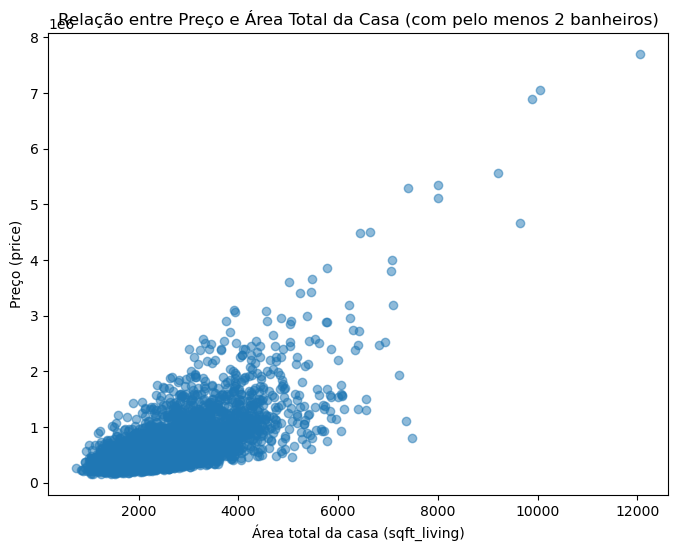

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered["sqft_living"], df_filtered["price"], alpha=0.5)
plt.xlabel("Área total da casa (sqft_living)")
plt.ylabel("Preço (price)")
plt.title("Relação entre Preço e Área Total da Casa (com pelo menos 2 banheiros)")
plt.show()

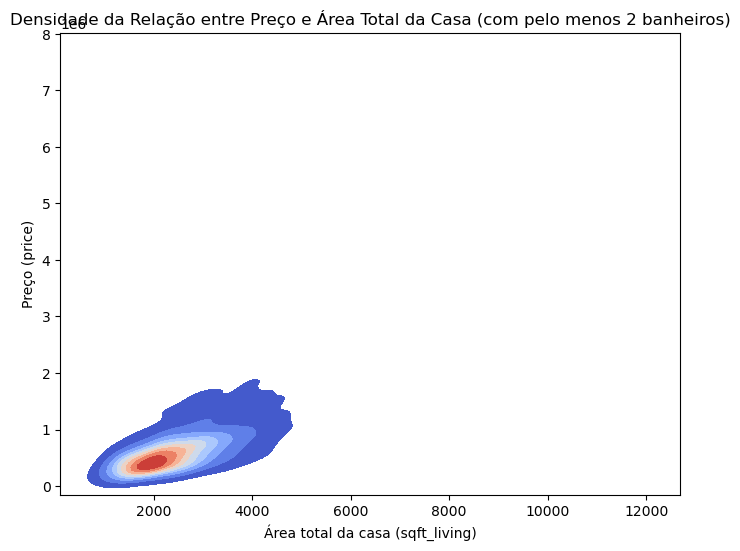

In [9]:
plt.figure(figsize=(8, 6))
sns.kdeplot(x=df_filtered["sqft_living"], y=df_filtered["price"], cmap="coolwarm", fill=True)
plt.xlabel("Área total da casa (sqft_living)")
plt.ylabel("Preço (price)")
plt.title("Densidade da Relação entre Preço e Área Total da Casa (com pelo menos 2 banheiros)")
plt.show()

3. Como a quantidade de banheiros bathrooms influencia na correlação entre a área total da casa sqft_living e o preço price?

In [12]:
banheiros_unicos = sorted(df["bathrooms"].unique())
# Criar um dicionário para armazenar as correlações
correlacoes = {}

for banheiros in banheiros_unicos:
    df_filtered = df[df["bathrooms"] == banheiros]
    if len(df_filtered) > 10:  # Evita cálculos em grupos muito pequenos
        correlacao = df_filtered["price"].corr(df_filtered["sqft_living"])
        correlacoes[banheiros] = correlacao
for banheiros, correlacao in correlacoes.items():
    print(f"Correlação entre preço e área total para {banheiros} banheiros: {correlacao:.2f}")

Correlação entre preço e área total para 0.75 banheiros: 0.36
Correlação entre preço e área total para 1.0 banheiros: 0.36
Correlação entre preço e área total para 1.5 banheiros: 0.42
Correlação entre preço e área total para 1.75 banheiros: 0.45
Correlação entre preço e área total para 2.0 banheiros: 0.45
Correlação entre preço e área total para 2.25 banheiros: 0.60
Correlação entre preço e área total para 2.5 banheiros: 0.56
Correlação entre preço e área total para 2.75 banheiros: 0.52
Correlação entre preço e área total para 3.0 banheiros: 0.57
Correlação entre preço e área total para 3.25 banheiros: 0.54
Correlação entre preço e área total para 3.5 banheiros: 0.57
Correlação entre preço e área total para 3.75 banheiros: 0.47
Correlação entre preço e área total para 4.0 banheiros: 0.58
Correlação entre preço e área total para 4.25 banheiros: 0.44
Correlação entre preço e área total para 4.5 banheiros: 0.80
Correlação entre preço e área total para 4.75 banheiros: 0.65
Correlação entre

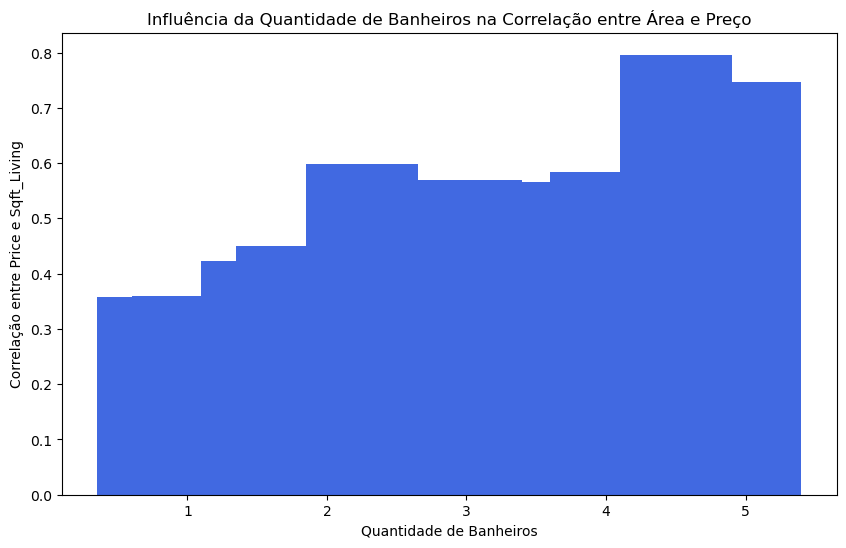

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(correlacoes.keys(), correlacoes.values(), color="royalblue")
plt.xlabel("Quantidade de Banheiros")
plt.ylabel("Correlação entre Price e Sqft_Living")
plt.title("Influência da Quantidade de Banheiros na Correlação entre Área e Preço")
plt.show()

4. Qual é a relação entre a condição da casa condition e o preço price, considerando apenas casas com uma área total sqft_living superior a 3000 pés quadrados?

In [14]:
# Filtrar casas com área total superior a 3000 pés quadrados
df_filtered = df[df["sqft_living"] > 3000]

# Calcular a correlação entre condição da casa e preço
corr_condition_price = df_filtered["condition"].corr(df_filtered["price"])
print(f"Correlação entre condição da casa e preço (para casas com sqft_living > 3000): {corr_condition_price:.2f}")

Correlação entre condição da casa e preço (para casas com sqft_living > 3000): 0.11


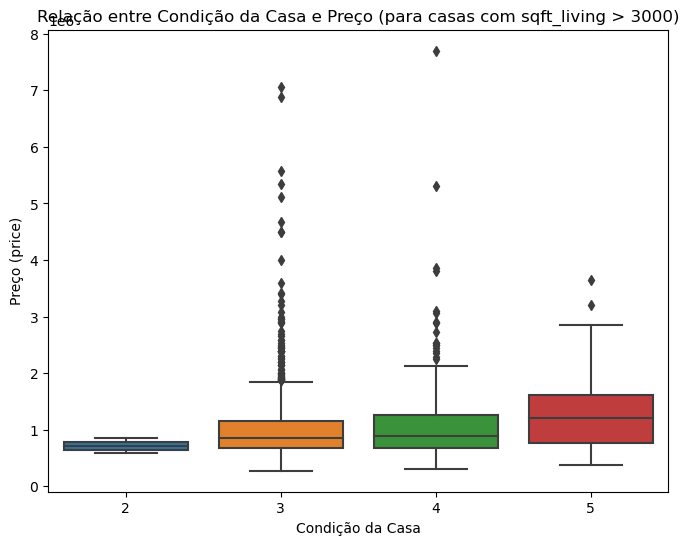

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_filtered["condition"], y=df_filtered["price"])
plt.xlabel("Condição da Casa")
plt.ylabel("Preço (price)")
plt.title("Relação entre Condição da Casa e Preço (para casas com sqft_living > 3000)")
plt.show()

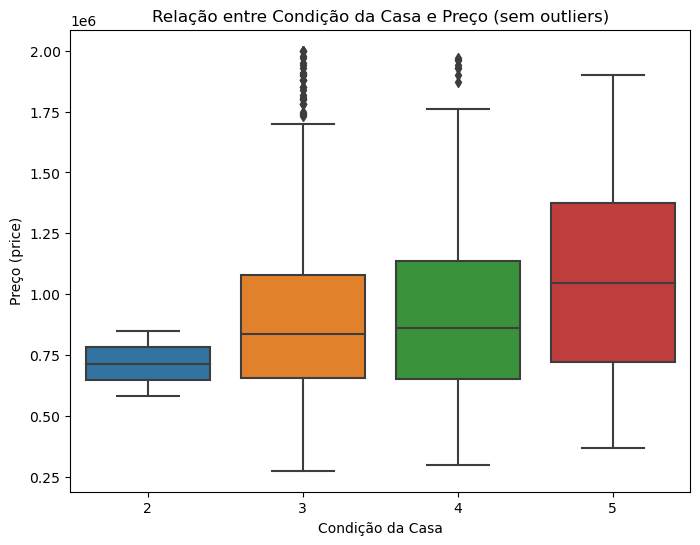

In [16]:
# Definir limites para remoção de outliers usando o método IQR
Q1 = df_filtered["price"].quantile(0.25)
Q3 = df_filtered["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites inferior e superior
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados removendo os outliers
df_cleaned = df_filtered[(df_filtered["price"] >= limite_inferior) & (df_filtered["price"] <= limite_superior)]

# Gerar o gráfico sem os outliers

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cleaned["condition"], y=df_cleaned["price"])
plt.xlabel("Condição da Casa")
plt.ylabel("Preço (price)")
plt.title("Relação entre Condição da Casa e Preço (sem outliers)")
plt.show()

5. Existe alguma correlação entre a localização geográfica lat e long e o preço price para casas com pelo menos três quartos bedrooms?

Correlação entre latitude e preço (sem outliers): 0.46
Correlação entre longitude e preço (sem outliers): 0.05


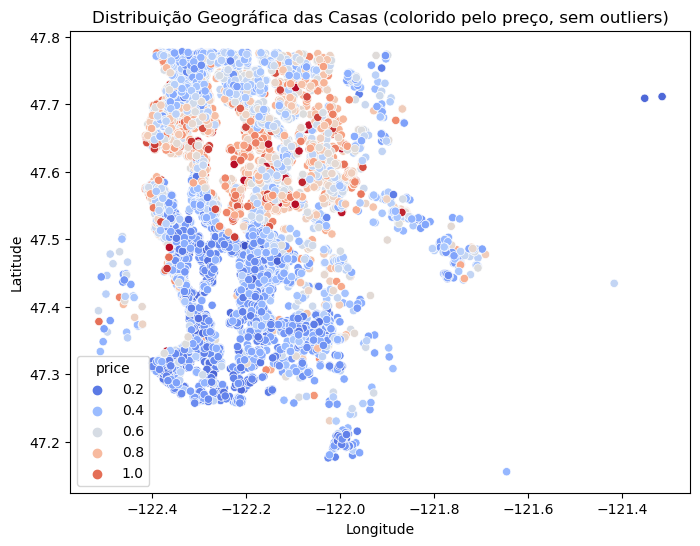

In [20]:
# Calcular o intervalo interquartil (IQR) do preço
Q1 = df_filtered["price"].quantile(0.25)
Q3 = df_filtered["price"].quantile(0.75)
IQR = Q3 - Q1

# Definir os limites para remoção de outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados removendo outliers
df_cleaned = df_filtered[(df_filtered["price"] >= limite_inferior) & (df_filtered["price"] <= limite_superior)]

# Calcular a correlação após remover os outliers
corr_lat_price_cleaned = df_cleaned["lat"].corr(df_cleaned["price"])
corr_long_price_cleaned = df_cleaned["long"].corr(df_cleaned["price"])

print(f"Correlação entre latitude e preço (sem outliers): {corr_lat_price_cleaned:.2f}")
print(f"Correlação entre longitude e preço (sem outliers): {corr_long_price_cleaned:.2f}")

# Gerar gráfico de dispersão atualizado
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_cleaned["long"], y=df_cleaned["lat"], hue=df_cleaned["price"], palette="coolwarm")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Distribuição Geográfica das Casas (colorido pelo preço, sem outliers)")
plt.show()

6. Calcule a correlação entre uma variável categórica(waterfront) e uma variável numérica(price) usando ANOVA.

In [26]:
# Remover outliers do preço usando IQR
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

df_cleaned = df[(df["price"] >= limite_inferior) & (df["price"] <= limite_superior)]

# Separar os grupos com e sem waterfront
grupo1 = df_cleaned[df_cleaned["waterfront"] == "n"]["price"]  # Casas sem vista para a água
grupo2 = df_cleaned[df_cleaned["waterfront"] == "y"]["price"]  # Casas com vista para a água

# Aplicar ANOVA
anova_result = stats.f_oneway(grupo1, grupo2)

# Exibir os resultados
print(f"Valor F da ANOVA: {anova_result.statistic:.2f}")
print(f"Valor-p da ANOVA: {anova_result.pvalue:.4f}")

# Interpretando o valor-p:
if anova_result.pvalue < 0.05:
    print("Existe uma diferença estatisticamente significativa no preço com base na variável waterfront.")
else:
    print("Não há diferença estatisticamente significativa no preço com base na variável waterfront.")

Valor F da ANOVA: 25.69
Valor-p da ANOVA: 0.0000
Existe uma diferença estatisticamente significativa no preço com base na variável waterfront.


Considerando a base de dados car_price.csv responda as questões de 7 a 11 abaixo:

7. Codifique e exiba a Matriz de correlação para as variáveis numéricas e dê exemplos de correlações positivas, negativas e neutras.

In [48]:
df = pd.read_csv("car_price.csv")
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


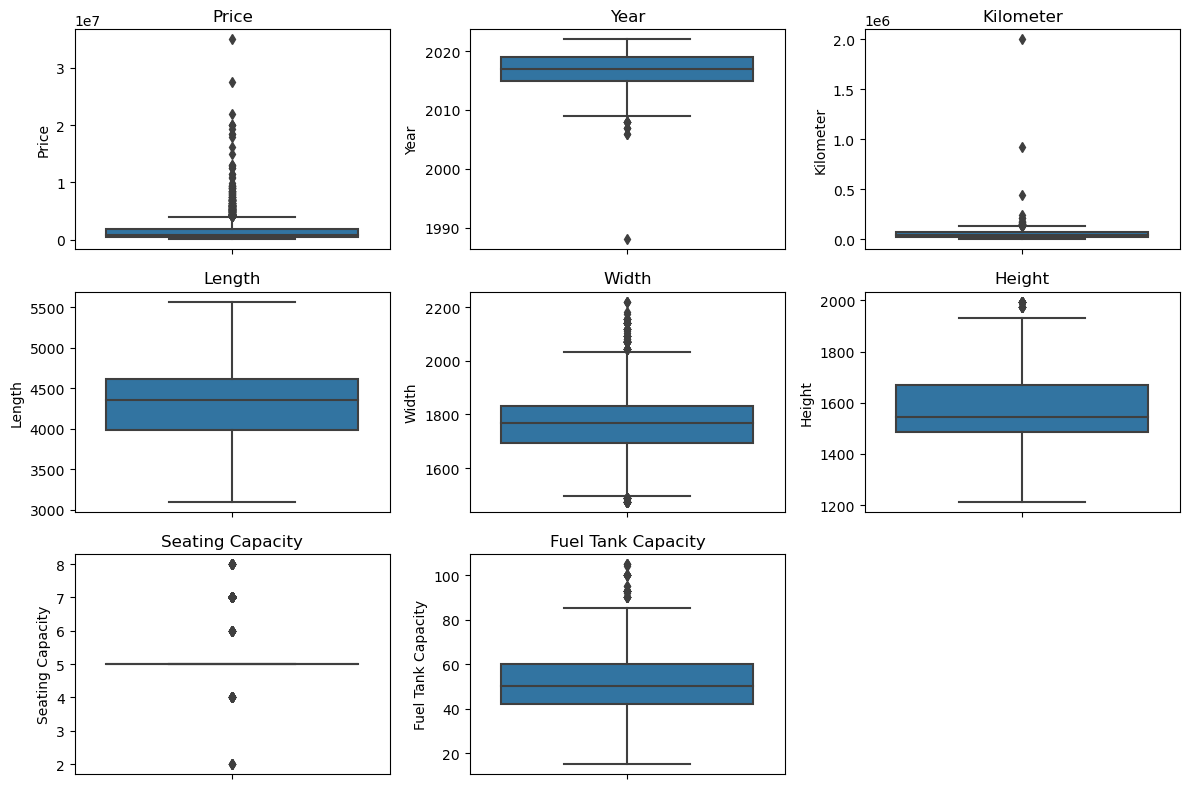

In [49]:
#Analise de outliers
# Selecionar apenas variáveis numéricas
numeric_cols = df.select_dtypes(include=["number"]).columns

# Criar boxplots para visualizar possíveis outliers
plt.figure(figsize=(12, 8))

for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [50]:
# Identificar outliers com base no IQR
outliers = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers[col] = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].shape[0]

# Exibir quantidade de outliers por variável numérica
for col, qtd_outliers in outliers.items():
    print(f"{col}: {qtd_outliers} outliers encontrados")

Price: 198 outliers encontrados
Year: 13 outliers encontrados
Kilometer: 30 outliers encontrados
Length: 0 outliers encontrados
Width: 156 outliers encontrados
Height: 30 outliers encontrados
Seating Capacity: 346 outliers encontrados
Fuel Tank Capacity: 50 outliers encontrados


In [51]:
# Lista das colunas com outliers
columns_with_outliers = ["Price", "Year", "Kilometer", "Width", "Height", "Seating Capacity", "Fuel Tank Capacity"]

# Criar uma cópia do DataFrame para evitar alterar os dados originais
df_cleaned = df.copy()

# Remover outliers em cada coluna usando IQR
for col in columns_with_outliers:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= limite_inferior) & (df_cleaned[col] <= limite_superior)]

# Exibir o tamanho do novo dataset após remoção dos outliers
print(f"Tamanho do dataset original: {df.shape[0]} linhas")
print(f"Tamanho do dataset após remoção de outliers: {df_cleaned.shape[0]} linhas")

Tamanho do dataset original: 1874 linhas
Tamanho do dataset após remoção de outliers: 1196 linhas


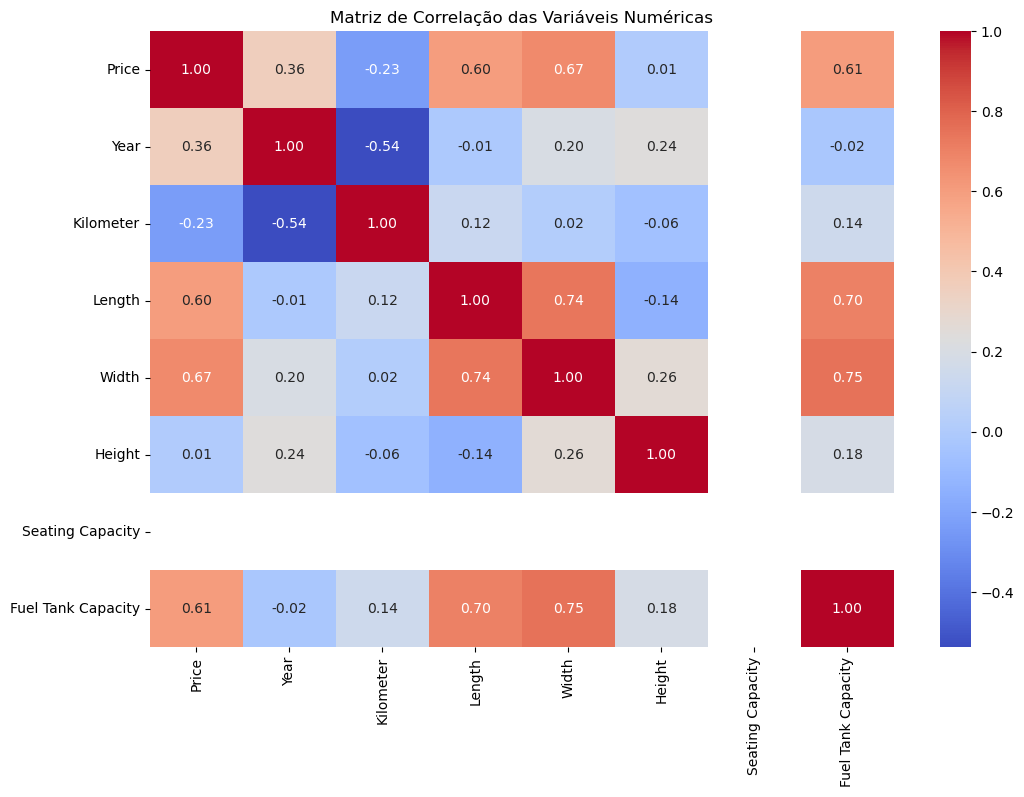

In [52]:
#Após analise e remoção de outliers, resposta do 7:

# Calcular a matriz de correlação após remoção dos outliers
numeric_cols = df_cleaned.select_dtypes(include=["number"])

# Calcular a matriz de correlação
corr_matrix = numeric_cols.corr()

# Exibir a matriz de correlação com mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()


8. Codifique e exiba Gráficos de Dispersão para cada uma das variáveis numéricas em relação à variável de interesse Price.

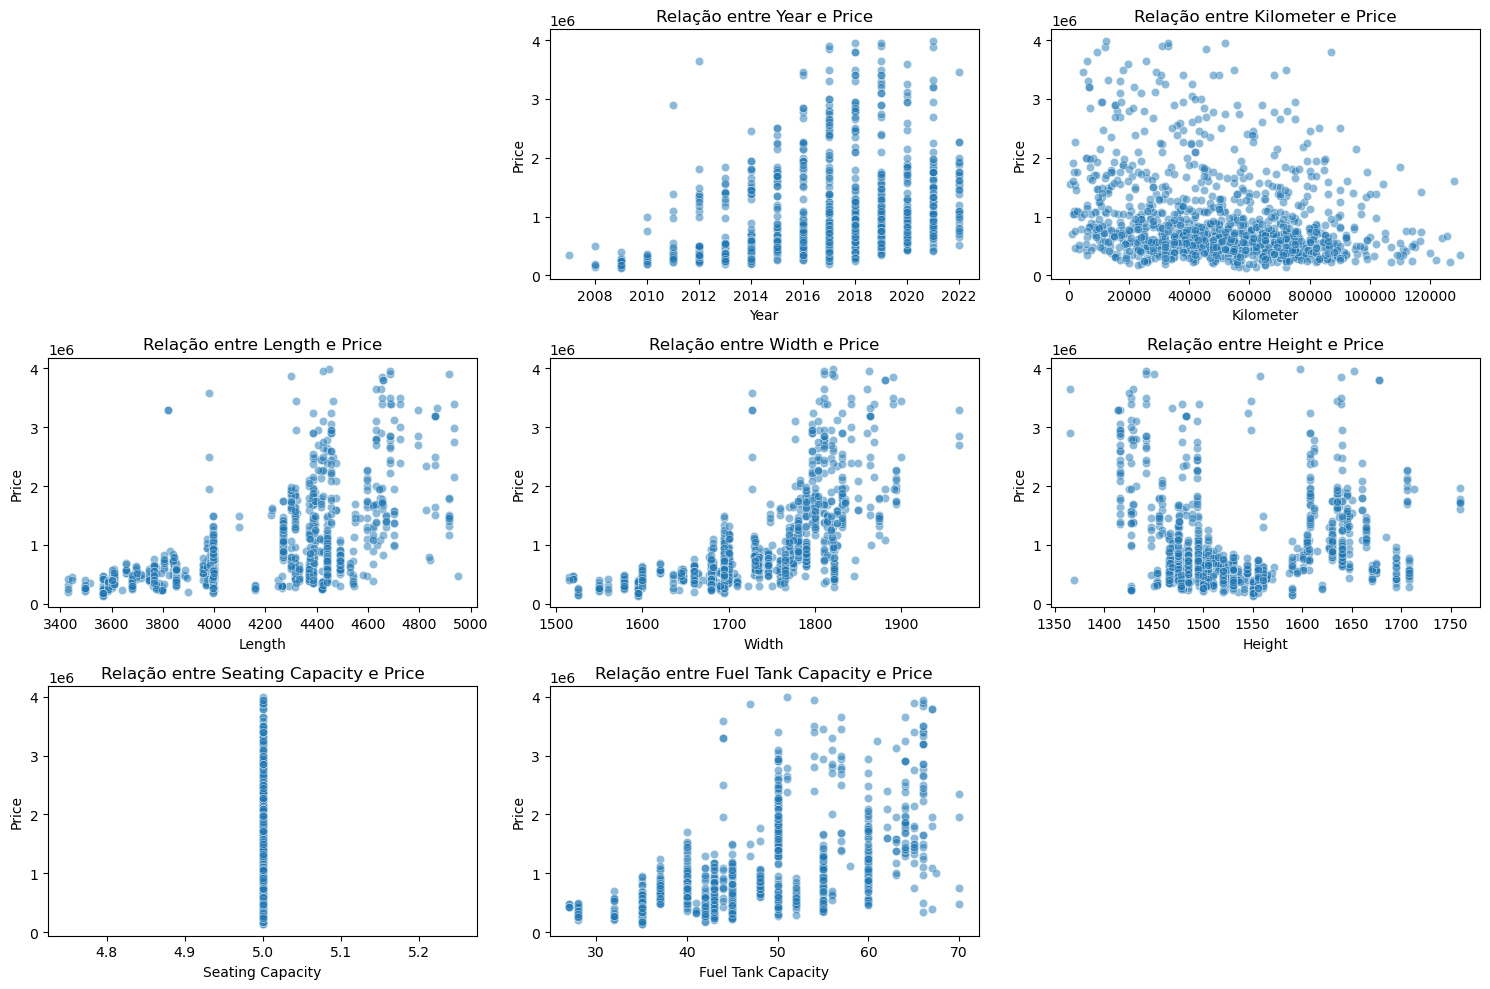

In [35]:
numeric_cols = df_cleaned.select_dtypes(include=["number"]).columns

# Criar gráficos de dispersão para cada variável numérica em relação a Price
plt.figure(figsize=(15, 10))

for i, col in enumerate(numeric_cols):
    if col != "Price":  # Evitar um gráfico de Price contra ele mesmo
        plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
        sns.scatterplot(x=df_cleaned[col], y=df_cleaned["Price"], alpha=0.5)
        plt.xlabel(col)
        plt.ylabel("Price")
        plt.title(f"Relação entre {col} e Price")

plt.tight_layout()
plt.show()


9. Crie um modelo de Regressão Linear Simples, exiba a Tabela de Regressão e exiba o plot da Reta Estimada.

In [36]:
# Definir variável independente (X) e dependente (y)
X = df_cleaned["Kilometer"]  # Substitua por outra variável se desejar
y = df_cleaned["Price"]

# Adicionar constante ao modelo
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Exibir a tabela de regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     69.07
Date:                Mon, 05 May 2025   Prob (F-statistic):           2.56e-16
Time:                        13:28:18   Log-Likelihood:                -17823.
No. Observations:                1196   AIC:                         3.565e+04
Df Residuals:                    1194   BIC:                         3.566e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.275e+06   4.54e+04     28.078      0.0

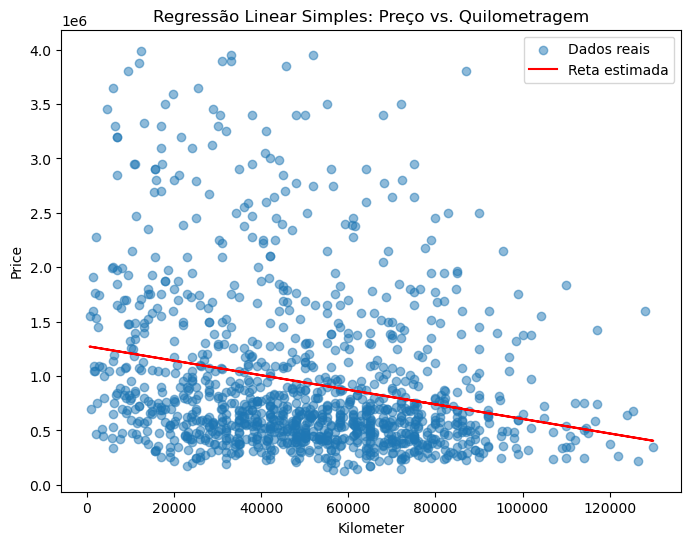

In [37]:
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned["Kilometer"], df_cleaned["Price"], alpha=0.5, label="Dados reais")
plt.plot(df_cleaned["Kilometer"], modelo.predict(X), color="red", label="Reta estimada")
plt.xlabel("Kilometer")
plt.ylabel("Price")
plt.title("Regressão Linear Simples: Preço vs. Quilometragem")
plt.legend()
plt.show()

10. Codifique e exiba o gráfico dos resíduos do modelo de Regressão Simples.

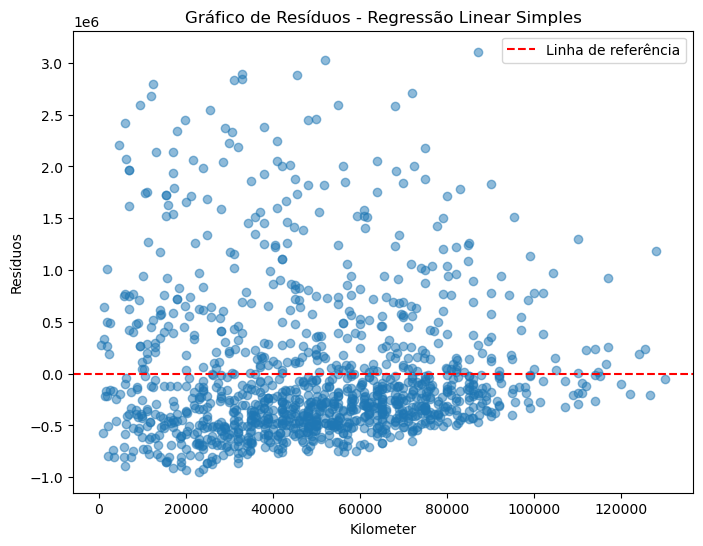

In [38]:
# Calcular os resíduos do modelo
residuos = modelo.resid

# Criar o gráfico dos resíduos
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned["Kilometer"], residuos, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", label="Linha de referência")
plt.xlabel("Kilometer")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos - Regressão Linear Simples")
plt.legend()
plt.show()

11. Crie um modelo de Regressão Multivariada, exiba a Tabela de Regressão e exiba o gráfico dos resíduos do modelo.

In [53]:
print(f"Tamanho do dataset após limpeza: {df_cleaned.shape[0]} linhas")

Tamanho do dataset após limpeza: 1196 linhas


In [54]:
print(df_cleaned.dtypes)

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object


In [55]:
print(df_cleaned.info())  # Verifica tipos e quantidade de valores não nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1872
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                1196 non-null   object 
 1   Model               1196 non-null   object 
 2   Price               1196 non-null   int64  
 3   Year                1196 non-null   int64  
 4   Kilometer           1196 non-null   int64  
 5   Fuel Type           1196 non-null   object 
 6   Transmission        1196 non-null   object 
 7   Location            1196 non-null   object 
 8   Color               1196 non-null   object 
 9   Owner               1196 non-null   object 
 10  Seller Type         1196 non-null   object 
 11  Engine              1196 non-null   object 
 12  Max Power           1196 non-null   object 
 13  Max Torque          1196 non-null   object 
 14  Drivetrain          1196 non-null   object 
 15  Length              1196 non-null   float64
 16  Width 

In [58]:
categorical_cols = df_cleaned.select_dtypes(include=["object"]).columns
print("Colunas categóricas identificadas:", categorical_cols)
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

Colunas categóricas identificadas: Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain'],
      dtype='object')


In [59]:
df_encoded = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

In [61]:
print(df_encoded.dtypes)

Price                                int64
Year                                 int64
Kilometer                            int64
Length                             float64
Width                              float64
                                    ...   
Max Torque_99.08 Nm @ 4500 rpm       uint8
Max Torque_99.081 Nm @ 4500 rpm      uint8
Max Torque_99@2800                   uint8
Drivetrain_FWD                       uint8
Drivetrain_RWD                       uint8
Length: 1110, dtype: object


In [62]:
X = df_encoded.drop(columns=["Price"])  # Remove a variável dependente
y = df_encoded["Price"]

X = sm.add_constant(X)  # Adiciona constante ao modelo
modelo_multivariado = sm.OLS(y, X).fit()

print(modelo_multivariado.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     40.37
Date:                Mon, 05 May 2025   Prob (F-statistic):          2.13e-263
Time:                        13:36:10   Log-Likelihood:                -15417.
No. Observations:                1196   AIC:                         3.225e+04
Df Residuals:                     490   BIC:                         3.584e+04
Df Model:                         705                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

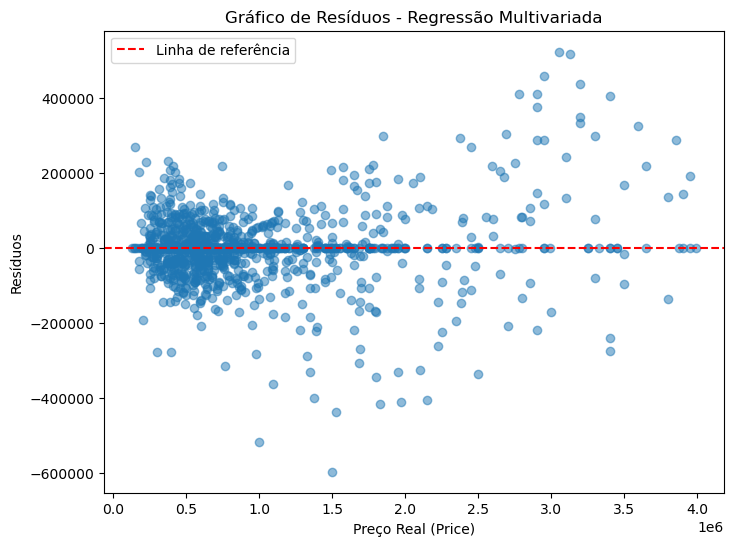

In [63]:
residuos = modelo_multivariado.resid

plt.figure(figsize=(8, 6))
plt.scatter(y, residuos, alpha=0.5)
plt.axhline(y=0, color="red", linestyle="--", label="Linha de referência")
plt.xlabel("Preço Real (Price)")
plt.ylabel("Resíduos")
plt.title("Gráfico de Resíduos - Regressão Multivariada")
plt.legend()
plt.show()